# Introduction #

Student performance can be closely linked with various demographic and cultural factors. While academic achievement is mostly measure as a result of scores on a multitude of tests, an academic institution would do well to recognize which demographics can be shown to have strong associations with academic achievement. This study aims to provide a framework for how institutions can idenitify groups within the student body and then learn more about the composition of these groups. By looking deeper, institutions can then provided targeted support proactively in order to provide a learning environment which is responsive to students and their backgrounds in order to allow students to learn better and achieve higher.

This dataset involves 11 categorical features giving context to a student's background. Features involving gender, ethnic group, parental education, free/reduced lunch status, parental marital status, first child status, and number of sibilings give an indication of home life and up bringing.  Other features including test prep completion, practice for sports, transportation means, and weekly study hours give insight into the interests and social habits. Combined, these features provide a good snapshot of "who a student is."

The project uses Multilayer Perceptron architecture to learn about the data to make a decision of "success." Subsequently, the resulting labels were used to learn about the groups and their demographic characteristics. This final step will be useful to see which characteristics are distinct and could be used to identify the groups in need on advanced academic support and intervention.

# Exploratory Data Analysis #

After reading in the data and taking a look, it can be seen that a number of rows have missing data deignated by "NaN." Removing these took away approximately 11,000 data entries, approximately one-third of the dataset. While sizeable, the remaining 19,243 entries is plenty big enough to provide a good amount of data to perform a proper analysis.

Some data cleaning is also necessary to reformat some entries to asssist in analysis. Shortening the Ethnic Group  and Parental Education designation, changing the type of Number of Siblings from numberic to categorical, and replacing the entries for Weekly Study Hours is needed. The Weekly Study Hours change will allow for easier Frequent Pattern analysis later on in the study.

Finally, a look at the most frequent entry in each column gives some indication of the demographics of a "typical" student. This will be helpful when performing a comparison with the "typical" student within each group.

In [387]:
import pandas as pd
import numpy as np


In [388]:
data = pd.read_csv('Expanded_data_with_more_features.csv')
data.columns

Index(['Unnamed: 0', 'Gender', 'EthnicGroup', 'ParentEduc', 'LunchType',
       'TestPrep', 'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild',
       'NrSiblings', 'TransportMeans', 'WklyStudyHours', 'MathScore',
       'ReadingScore', 'WritingScore'],
      dtype='object')

In [389]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [390]:
data.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [391]:
#Remove NAs
data.dropna(axis='index', inplace=True)
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [392]:
#data cleaning
import re

data['EthnicGroup'] = [x.split(' ')[1] for x in data['EthnicGroup']]
data['ParentEduc'] = [x.split(' ')[0] for x in data['ParentEduc']]
data['ParentEduc'] = [x.split("'")[0] for x in data['ParentEduc']]
dic = {"5":"Low", "510": "Mid", "10": "High"}
data['WklyStudyHours'] = [re.sub("\D", "", x) for x in data['WklyStudyHours']]
data = data.replace({"WklyStudyHours":dic})
data['NrSiblings'] = data['NrSiblings'].astype('object')

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19243 entries, 2 to 30640
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               19243 non-null  object
 1   EthnicGroup          19243 non-null  object
 2   ParentEduc           19243 non-null  object
 3   LunchType            19243 non-null  object
 4   TestPrep             19243 non-null  object
 5   ParentMaritalStatus  19243 non-null  object
 6   PracticeSport        19243 non-null  object
 7   IsFirstChild         19243 non-null  object
 8   NrSiblings           19243 non-null  object
 9   TransportMeans       19243 non-null  object
 10  WklyStudyHours       19243 non-null  object
 11  MathScore            19243 non-null  int64 
 12  ReadingScore         19243 non-null  int64 
 13  WritingScore         19243 non-null  int64 
dtypes: int64(3), object(11)
memory usage: 2.2+ MB


In [393]:
#Describe a typical student
data.describe(include = 'object')

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours
count,19243,19243,19243,19243,19243,19243,19243,19243,19243.0,19243,19243
unique,2,5,5,2,2,4,3,2,8.0,2,3
top,female,C,some,standard,none,married,sometimes,yes,1.0,school_bus,Mid
freq,9775,6181,8083,12472,12587,11009,9715,12417,5407.0,11280,10499


In [394]:
#Describe a typical performance
data.describe()

,MathScore,ReadingScore,WritingScore
count,19243.000000,19243.000000,19243.000000
mean,66.635504,69.534324,68.602869
std,15.362362,14.785547,15.481824
min,0.000000,10.000000,4.000000
25%,56.000000,59.000000,58.000000
50%,67.000000,70.000000,69.000000
75%,78.000000,80.000000,80.000000
max,100.000000,100.000000,100.000000


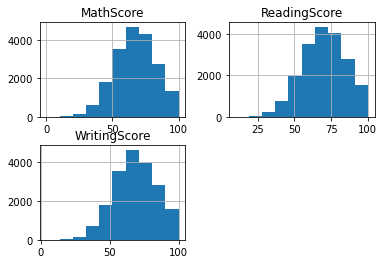

In [395]:
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt

data.hist()
plt.show()

An arbritrary definition of success is used classifying any student performing above average in the aggregate and "successful."  It is important to note that a student could be above average in one or two areas - Math, Reading, or Writing - and still be classified as "not successful." But, for the nature of this project, this simplistic definition should suffice.

In [396]:
cutoff = data['MathScore'].quantile(q=0.5) + data['ReadingScore'].quantile(q=0.5) + data['WritingScore'].quantile(q=0.5)
data['success'] = np.where(data['MathScore'] + data['ReadingScore'] + data['WritingScore'] > cutoff, "1", "0")

A relative even split of "successful" and "not successful" should provide for good modeling outcomes and the ability to recognize patterns consistent with both classifications.

<AxesSubplot:ylabel='success'>

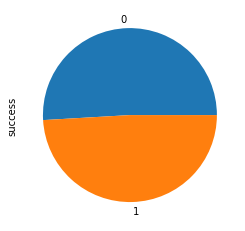

In [397]:
data['success'].value_counts().plot(kind='pie')

# Model Design #

The data are divided into two groups, a training and testing set. These will be used to train the model and then test its performance. Since all the data are categorical variables, they will need to be encoded into a binary numeric form for the modeling. One-Hot encoding creates new variable columns for each category answer within a column, filling in a 1 to confirm the answer and a 0 if it was any other category answer. A variable columns with three responses would be recorded into three new columns, with 1 if the answer matched the column and 0 if it did not. Ordinal Encoding gives each answer a numeric answer. If there were 5 different responses, the numbers 0 to 4 were recorded in an array.

For each encoding, a Multilayer Perceptron model was fit and the accuracy analyzed.  Regardless of the encoding, a similar performance resulted meaning that neither encoding was preferred. The accuracy of approximately 66% could demonstrate the inherent issues with predicting student performance solely by racial, ethic, or other demographic variables. 

In [398]:
y = data['success']
X = data.drop(columns=['success','MathScore','ReadingScore','WritingScore'])

In [399]:
train_pct_index = int(0.8 * len(X))
X_train, X_test = X[:train_pct_index], X[train_pct_index:]
y_train, y_test = y[:train_pct_index], y[train_pct_index:]

In [400]:
#source: https://machinelearningmastery.com/how-to-prepare-categorical-data-for-deep-learning-in-python/
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

def prepare_inputs_hot(X_train, X_test):
    ohe = OneHotEncoder()
    ohe.fit(X_train)
    X_train_enc = ohe.transform(X_train)
    X_test_enc = ohe.transform(X_test)
    return X_train_enc, X_test_enc
 
# prepare target
def prepare_targets_hot(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc

X_train_hot, X_test_hot = prepare_inputs_hot(X_train, X_test)
y_train_hot, y_test_hot = prepare_targets_hot(y_train, y_test)

In [401]:
X_train_hot

<15394x38 sparse matrix of type '<class 'numpy.float64'>'
	with 169334 stored elements in Compressed Sparse Row format>

In [402]:
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

classifier = MLPClassifier(hidden_layer_sizes=5, activation='relu',
                              solver='sgd', random_state=42, learning_rate='adaptive')
classifier.fit(X_train_hot, y_train_hot)
    
preds = classifier.predict(X_test_hot)
score = np.round(metrics.accuracy_score(y_test_hot, preds), 2)
print('Mean Accuracy of Predictions: ' + str(score))
cnf_matrix = metrics.confusion_matrix(y_test_hot, preds)
print('Confusion matrix')
print(cnf_matrix)
    

Mean Accuracy of Predictions: 0.66
Confusion matrix
[[1341  646]
 [ 680 1182]]


In [403]:
#source: https://machinelearningmastery.com/how-to-prepare-categorical-data-for-deep-learning-in-python/
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

# prepare input data
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder()
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc
 
# prepare target
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc

X_train_ord, X_test_ord = prepare_inputs(X_train, X_test)
y_train_ord, y_test_ord = prepare_targets(y_train, y_test)

In [404]:
X_train_ord

array([[0., 1., 3., ..., 4., 1., 1.],
       [1., 2., 4., ..., 0., 1., 2.],
       [0., 1., 0., ..., 1., 1., 2.],
       ...,
       [0., 3., 3., ..., 6., 0., 2.],
       [1., 2., 0., ..., 2., 0., 2.],
       [1., 2., 4., ..., 1., 1., 1.]])

In [405]:
classifier2 = MLPClassifier(hidden_layer_sizes=5, activation='relu',
                              solver='sgd', random_state=42, learning_rate='adaptive')
classifier2.fit(X_train_ord, y_train_ord)
    
preds2 = classifier2.predict(X_test_ord)
score2 = np.round(metrics.accuracy_score(y_test_ord, preds2), 2)
print('Mean Accuracy of Predictions: ' + str(score2))
cnf_matrix = metrics.confusion_matrix(y_test_ord, preds2)
print('Confusion matrix')
print(cnf_matrix)

Mean Accuracy of Predictions: 0.65
Confusion matrix
[[1257  730]
 [ 624 1238]]


# Model Comparison #

The performance of the above model was compared to the performance of some well known non-deep learning classification algorithms, Logistic Regression, Support Vector Machine for Classification, Random Forrest, and Naive Bayes.  

None of these four algorithms performed better that the Multilayer Perceptron though two, Logistic Regression and Naive Bayes, performed similarly. 

In [406]:
#source: https://medium.com/@andrii.gozhulovskyi/choosing-a-model-for-binary-classification-problem-f211f7a4e263
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import CategoricalNB

print('Logistic Regression')
logreg = log_reg = LogisticRegression()
log_reg.fit(X_train_hot, y_train_hot)
y_pred = log_reg.predict(X_test_hot)
cnf_matrix = metrics.confusion_matrix(y_test_hot, y_pred)
print('Confusion matrix')
print(cnf_matrix)
print('Accuracy:', metrics.accuracy_score(y_test_hot, y_pred))
print('\n')

print('Support Vector Classifier')
svm_clf = svm.SVC(kernel='rbf', gamma='scale', C=1)
svm_clf.fit(X_train_hot, y_train_hot)
y_pred = svm_clf.predict(X_test_hot)
cnf_matrix = metrics.confusion_matrix(y_test_hot, y_pred)
print('Confusion matrix')
print(cnf_matrix)
print('---------------')
print('Accuracy:', metrics.accuracy_score(y_test_hot, y_pred))
print('\n')

print('Random Forrest Classifier')
rnd_clf = RandomForestClassifier()
rnd_clf.fit(X_train_hot, y_train_hot)
y_pred = rnd_clf.predict(X_test_hot)
cnf_matrix = metrics.confusion_matrix(y_test_hot, y_pred)
print('Confusion matrix')
print(cnf_matrix)
print('---------------')
print('Accuracy:', metrics.accuracy_score(y_test_hot, y_pred))
print('\n')

print('Naive Bayes')
bayes = CategoricalNB()
bayes.fit(X_train_ord, y_train_ord)
y_pred = bayes.predict(X_test_ord)
cnf_matrix = metrics.confusion_matrix(y_test_ord, y_pred)
print('Confusion matrix')
print(cnf_matrix)
print('---------------')
print('Accuracy:', metrics.accuracy_score(y_test_ord, y_pred))

Logistic Regression
Confusion matrix
[[1346  641]
 [ 666 1196]]
Accuracy: 0.6604312808521694


Support Vector Classifier
Confusion matrix
[[1313  674]
 [ 675 1187]]
---------------
Accuracy: 0.6495193556767992


Random Forrest Classifier
Confusion matrix
[[1209  778]
 [ 756 1106]]
---------------
Accuracy: 0.601454923356716


Naive Bayes
Confusion matrix
[[1344  643]
 [ 677 1185]]
---------------
Accuracy: 0.65705378020265


# Analysis of Classifcations #

In order to apply the finding of the model, individuals from the testing set were labeled as Positives, Negatives, False Positive, and False Negative based on the outcome of the model. Each group was then inspected for further insight and trends which can distinguish it from others. Specifically, false negatives were compared to the positives group as they should share some similarities as groups with the potential for academic success. Similarly, the negatives and false positives were compared in order to highlight differences which could be helpful.

First though, a column was added to the testing dataset containing the prediction for each test instance. Then, based on the combination of actual and predicted success classification, the instance was labeled as Positive, Negatie, False Positive or False Negative.

The data were split according to the classification, a typical or most frequent outcome stated, and then the distriubtion of each variable visualized.

In [407]:
predictions = pd.DataFrame(preds, dtype='object', columns=['Prediction'])
print(len(predictions))
predictions.head()


3849


,Prediction
0,1
1,1
2,0
3,1
4,0


In [408]:
final_df = pd.concat([X_test, y_test], axis=1)
final_df.reset_index(inplace=True)
final_df['Predictions']=predictions
print(final_df.shape)
final_df.info()


(3849, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3849 entries, 0 to 3848
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   index                3849 non-null   int64 
 1   Gender               3849 non-null   object
 2   EthnicGroup          3849 non-null   object
 3   ParentEduc           3849 non-null   object
 4   LunchType            3849 non-null   object
 5   TestPrep             3849 non-null   object
 6   ParentMaritalStatus  3849 non-null   object
 7   PracticeSport        3849 non-null   object
 8   IsFirstChild         3849 non-null   object
 9   NrSiblings           3849 non-null   object
 10  TransportMeans       3849 non-null   object
 11  WklyStudyHours       3849 non-null   object
 12  success              3849 non-null   object
 13  Predictions          3849 non-null   object
dtypes: int64(1), object(13)
memory usage: 421.1+ KB


In [409]:
final_df.head()

,index,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,success,Predictions
0,24516,female,D,some,standard,completed,single,sometimes,no,3.0,school_bus,Mid,1,1
1,24517,female,E,master,standard,none,married,sometimes,yes,1.0,private,Mid,1,1
2,24518,female,B,high,standard,none,single,sometimes,no,5.0,private,Low,1,0
3,24519,male,D,high,standard,completed,single,regularly,no,2.0,private,Low,1,1
4,24520,male,B,some,standard,none,married,regularly,no,4.0,private,Mid,0,0


In [416]:
poss = final_df.loc[(final_df['success']=='1') & (final_df['Predictions']==1)]
negs = final_df.loc[(final_df['success']=='0') & (final_df['Predictions']==0)]
false_negs = final_df.loc[(final_df['success']=='1') & (final_df['Predictions']==0)]
false_poss = final_df.loc[(final_df['success']=='0') & (final_df['Predictions']==1)]

cats = final_df.columns.to_list()[1:12]

<u>Positives vs False Negatives</u>

False negatives should be similar to positives in that they should share many characteristics which would indicate academic success. This comparison is important because a false negative classification will set a student on a path for underwhelming academic success relative to reality.

Both groups in fact do share some similarities but have some clear distinctions as well. False negatives are more like to have not completed a prep course and study for low hours. This is unsurprising and gives and indiciation that it is the individual students application to their learning which is indicative of academic success rather than some inate quality of "smartness."

It is interesting though that the false negative group is more likely to have parents who have a high school level of education, few sibilings, and take private transportation to school. False negatives are also more likely to have free/reduced lunch, giving an indication as to the weight of socioeconomic status with the classification algorithm.

In [417]:
poss.describe(include='object')

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,success,Predictions
count,1182,1182,1182,1182,1182,1182,1182,1182,1182.0,1182,1182,1182,1182
unique,2,5,5,2,2,4,3,2,8.0,2,3,1,1
top,female,D,some,standard,completed,married,sometimes,no,1.0,school_bus,Mid,1,1
freq,720,356,366,1071,679,706,558,595,355.0,703,651,1182,1182


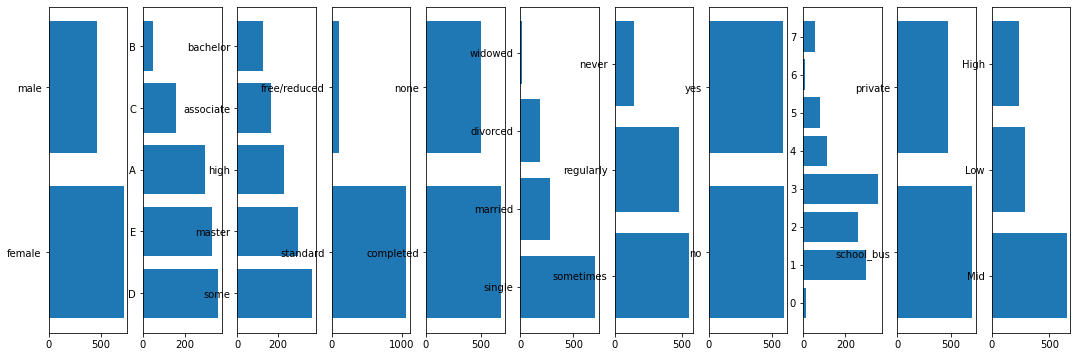

In [418]:
fig = plt.figure(figsize=(20,6))

for i in range(len(cats)):
    
    labels = poss[cats[i]].unique()
    vals = poss[cats[i]].value_counts()
    
    ax = fig.add_subplot(1, 12, i + 1)
    ax.barh(labels, vals)

In [419]:
false_negs.describe(include='object')

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,success,Predictions
count,680,680,680,680,680,680,680,680,680.0,680,680,680,680
unique,2,5,5,2,2,4,3,2,8.0,2,3,1,1
top,male,C,some,standard,none,married,sometimes,yes,1.0,school_bus,Mid,1,0
freq,366,252,330,356,554,372,344,342,205.0,421,377,680,680


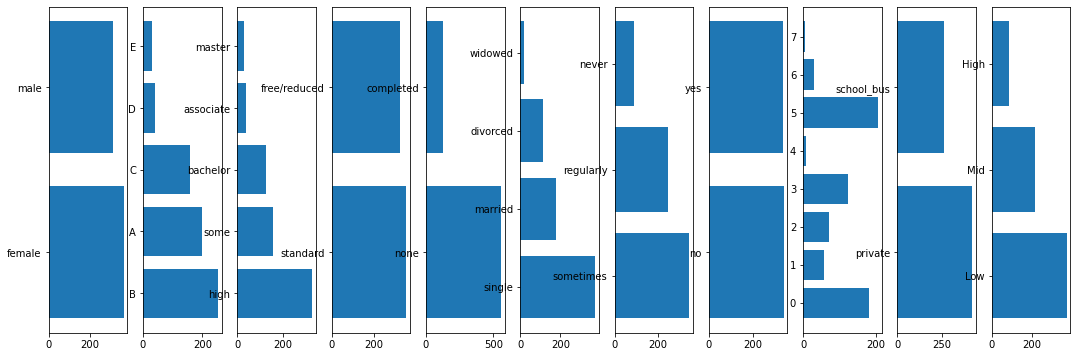

In [420]:
fig = plt.figure(figsize=(20,6))

for i in range(len(cats)):
    
    labels = false_negs[cats[i]].unique()
    vals = false_negs[cats[i]].value_counts()
    
    ax = fig.add_subplot(1, 12, i + 1)
    ax.barh(labels, vals)

<u>Negatives vs False Positives</u>

Negative classifications and false positives should share some similarities which are indicative of not achieving academic success. This disitinction is important as a false positive classification can set a student up in courses or on a track for which they are not prepared academically.

False positives, unsurprisingly, share many characteristics with positive classifications, most notably being female - while Negatives are predominately male. They also are comprised of students who spend a high amount of hours studying and have few sibilings.  Particularly the high amount of study hours could indicate that these students try to work or practice their way to success through repetition and memorization which more successful students grasp at concepts more quickly. 

While far from distinctive, these distinctions are noticeable can do have some relevancy to what is known about learning methods and how students internalize information. 

In [421]:
negs.describe(include='object')

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,success,Predictions
count,1341,1341,1341,1341,1341,1341,1341,1341,1341.0,1341,1341,1341,1341
unique,2,5,5,2,2,4,3,2,8.0,2,3,1,1
top,male,C,some,free/reduced,none,married,sometimes,yes,1.0,school_bus,Mid,0,0
freq,792,494,680,855,1116,779,692,681,375.0,795,743,1341,1341


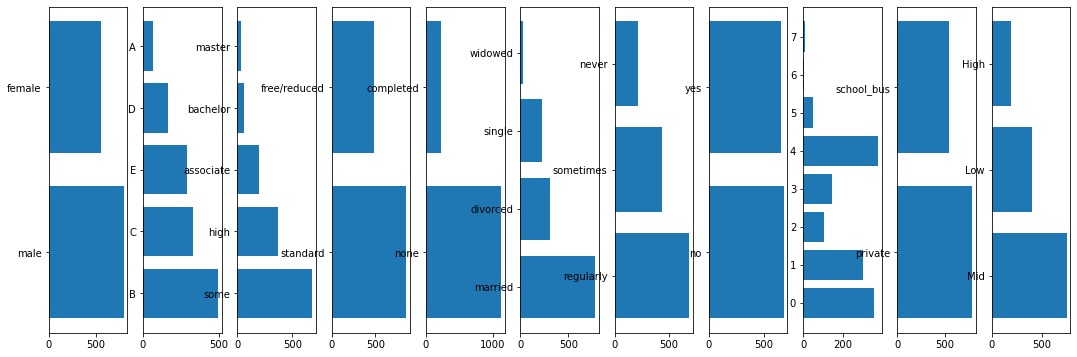

In [422]:
fig = plt.figure(figsize=(20,6))

for i in range(len(cats)):
    
    labels = negs[cats[i]].unique()
    vals = negs[cats[i]].value_counts()
    
    ax = fig.add_subplot(1, 12, i + 1)
    ax.barh(labels, vals)

In [423]:
false_poss.describe(include='object')

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,success,Predictions
count,646,646,646,646,646,646,646,646,646.0,646,646,646,646
unique,2,5,5,2,2,4,3,2,8.0,2,3,1,1
top,female,D,some,standard,none,married,sometimes,no,1.0,school_bus,Mid,0,1
freq,367,195,232,579,336,382,322,364,203.0,393,360,646,646


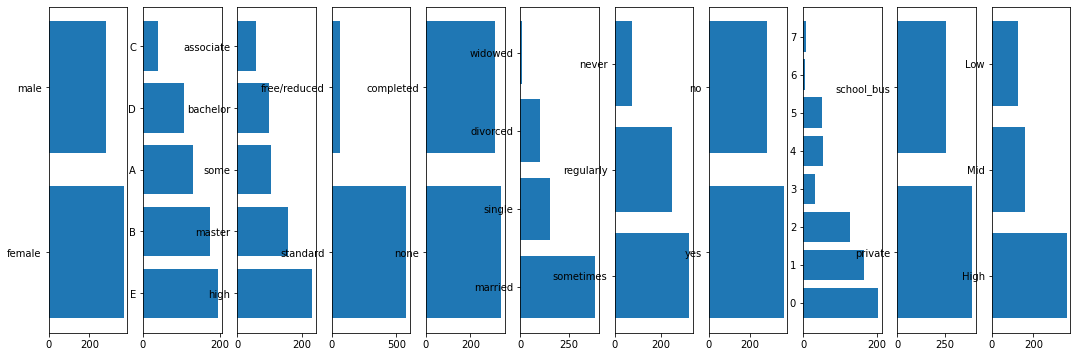

In [424]:
fig = plt.figure(figsize=(20,6))

for i in range(len(cats)):
    
    labels = false_poss[cats[i]].unique()
    vals = false_poss[cats[i]].value_counts()
    
    ax = fig.add_subplot(1, 12, i + 1)
    ax.barh(labels, vals)

# Conclusion #

While not perfect, this project did demonstrate a proof-of-concept for using deep learning techniques to determine student classifications and then identify specific criteria which distinguish classification groups from each other. Though not definitive, it does give a framework for how schools and education institutions can learn about their students in more concrete ways. From there, appropriate feedback, support, and intervention can be utilized in an informed manner which can suppport the students to be successful.

While the modeling created a far too large number of misclassified individuals - about 34% - each classification proved to be useful and informative to the educational institution. Improving the model performance is critical to learning who tend to be successful in a given academic setting. The provided dataset did not have a complete set of variables which look into what is known to correlate with academic achievement, most notably teacher quality. It did take into account socio-economic status, commute time, work level, and ethic background which all have some correlation to academic success. Most notably though, the metric of success what arbitrary and based solely on standardized test scores which are at best an imperfect measure of student achievement. While necessary, these test results should be matched with school-specific achievement metrics which go beyond academic achievement to inculde extra-curriculuar and social barometers of success.

In conclusion, this project demonstrated the methods by which schools can research to learn about students. As a result, decision makers can make smart, informed decisions. It will be necessary for those decision makers to understand the utilization of machine and deep learning methods to understand the meaning and limitations of these models and their application to a school setting. Given the importance of the decisions institutions make regarding their students and the impact schools have on the their students, the importance of this knowledge and understanding cannot be understated.